# Smoothing Methods: Using Regression and Trailing Moving Average.

### Import required packages.

In [99]:
from pathlib import Path

import numpy as np 
import pandas as pd 
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa.stattools import acf
from dmba import regressionSummary
import warnings

import matplotlib.pylab as plt
%matplotlib inline

### Create templates for graph layout. 

In [127]:
# Create a template for graph layout with partitions for data set. 
def Graph_Layout_Partition_Data():
    # Determine coordinates for drawing vertical lines and 
    # horizontal arrows on the chart.    
    one_month = pd.Timedelta('31 days')
    xtrain = (min(train_ts.index), max(train_ts.index) - one_month)
    xvalid = (min(valid_ts.index) + one_month, max(valid_ts.index) - one_month)
    xfuture = (max(valid_ts.index) + one_month, '2022')
    xtv = xtrain[1] + 0.7 * (xvalid[0] - xtrain[1])
    xvf = xvalid[1] + 1.0 * (xfuture[0] - xvalid[1])

    ax.axvline(x=xtv, ymin=0, ymax=1, color='black', linewidth=0.5)
    ax.axvline(x=xvf, ymin=0, ymax=1, color='black', linewidth=0.5)

    plt.annotate('', xy=('2013-12', 3300), xytext=('1991', 3300), 
              arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
    plt.annotate('', xy=('2018-12', 3300), xytext=('2014-2', 3300), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
    plt.annotate('', xy=('2021-12', 3300), xytext=('2019-2', 3300), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))

    # Input text on the arrows.
    ax.text('2001', 3330, 'Training')
    ax.text('2015-1', 3330, 'Validation')
    ax.text('2019-7', 3330, 'Future')

    # Create limits and axis labels.
    ax.set_xlim('1990', '2022')
    ax.set_ylim(1300, 3500)
    ax.set_xlabel('Time')
    ax.set_ylabel('Ridership (in 000s)')

# Create a template for graph layout with partitions for residuals. 
def Graph_Layout_Partition_Residuals():
    # Determine coordinates for drawing vertical lines and 
    # horizontal arrows on the chart.    
    one_month = pd.Timedelta('31 days')
    xtrain = (min(train_ts.index), max(train_ts.index) - one_month)
    xvalid = (min(valid_ts.index) + one_month, max(valid_ts.index) - one_month)
    xfuture = (max(valid_ts.index) + one_month, '2022')
    xtv = xtrain[1] + 0.7 * (xvalid[0] - xtrain[1])
    xvf = xvalid[1] + 1.0 * (xfuture[0] - xvalid[1])

    ax.axvline(x=xtv, ymin=0, ymax=1, color='black', linewidth=0.5)
    ax.axvline(x=xvf, ymin=0, ymax=1, color='black', linewidth=0.5)

    plt.annotate('', xy=('2013-12', 600), xytext=('1991', 600), 
              arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
    plt.annotate('', xy=('2018-12', 600), xytext=('2014-2', 600), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
    plt.annotate('', xy=('2021-12', 600), xytext=('2019-2', 600), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))

    # Input text on the arrows.
    ax.text('2001', 620, 'Training')
    ax.text('2015-1', 620, 'Validation')
    ax.text('2019-7', 620, 'Future')

    # Create limits and axis labels.
    ax.set_xlim('1990', '2022')
    ax.set_ylim(-600, 700)
    ax.set_xlabel('Time')
    ax.set_ylabel('Ridership (in 000s)')


# Create a template for graph layout with entire dataset and 12 periods 
# into future. 
def Graph_Layout_Entire_Data():
    # Determine coordinates for drawing vertical lines and horizontal 
    # arrows on the chart.
    one_month = pd.Timedelta('31 days')
    xridership = (min(ridership_ts.index), max(ridership_ts.index) - one_month)
    xfuture = (max(ridership_ts.index) + one_month, '2022')
    xvf = xridership[1] + 0.7 * (xfuture[0] - xridership[1])

    ax.axvline(x=xvf, ymin=0, ymax=1, color='black', linewidth=0.5)

    plt.annotate('', xy=('2018-12', 3300), xytext=('1991', 3300), 
              arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
    plt.annotate('', xy=('2021-12', 3300), xytext=('2019-2', 3300), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))

    # Input text on the arrows.
    ax.text('2005', 3330, 'Training')
    ax.text('2019-7', 3330, 'Future')

    # Create limits and axis labels.
    ax.set_xlim('1990', '2022')
    ax.set_ylim(1300, 3500)
    ax.set_xlabel('Time')
    ax.set_ylabel('Ridership (in 000s)')
    

# Create a template for graph layout with entire data for residuals. 
def Graph_Layout_Entire_Data_Residuals():
    # Determine coordinates for drawing vertical lines and 
    # horizontal arrows on the chart.    
    one_month = pd.Timedelta('31 days')
    xridership = (min(ridership_ts.index), max(ridership_ts.index) - one_month)
    xfuture = (max(ridership_ts.index) + one_month, '2022')
    xvf = xridership[1] + 0.7 * (xfuture[0] - xridership[1])

    ax.axvline(x=xvf, ymin=0, ymax=1, color='black', linewidth=0.5)

    plt.annotate('', xy=('2018-12', 600), xytext=('1991', 600), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
    plt.annotate('', xy=('2021-12', 600), xytext=('2019-2', 600), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))

    # Input text on the arrows.
    ax.text('2005', 620, 'Training')
    ax.text('2019-7', 620, 'Future')

    # Create limits and axis labels.
    ax.set_xlim('1990', '2022')
    ax.set_ylim(-600, 700)
    ax.set_xlabel('Time')
    ax.set_ylabel('Ridership (in 000s)')

### Create measures of forecast accuracy.

In [101]:
# Create forcast accuracy measures.
def Forecast_Accuracy(actual, forecast):
    
    # ME - mean error.
    me = round(np.mean(actual - forecast),3) 
    
    # RMSE - root mean square error (RMSE).
    rmse = round((np.mean((actual - forecast)**2)**.5),3)  
   
    # MAE - mean absolute error.
    mae = round(np.mean(np.abs(actual - forecast)),3)   
   
    # MPE - mean percentage error,%.
    mpe = round(((np.mean((actual - forecast)/actual))*100),3) 
    
    # MAPE - mean absolute percentage error, %.
    mape = round(((np.mean(np.abs((actual - forecast)/actual)))*100),3) 
    
    # Ignore unnecessary future warnings on ACF1. 
    warnings.filterwarnings('ignore')
    
    # ACF1 - autocorrelation of errors at lag 1.
    acf1 = round((acf(actual - forecast)[1]),3)                  
    
    return({'ME':me, 'RMSE':rmse, 'MAE':mae, 
            'MPE':mpe, 'MAPE':mape, 'ACF1':acf1})

### Create time series data set.

In [102]:
# Create Amtrak data frame.
Amtrak_data = pd.read_csv('Amtrak_comp.csv')

# Display the first 5 records of Amtrak data set.

# Convert the date information to a datetime object as monthly data.
Amtrak_data['Date'] = pd.to_datetime(Amtrak_data.Month)

# Convert data set to time series  data set. Name is used 
# to label the data.
ridership_ts = pd.Series(Amtrak_data.Ridership.values, 
                index=Amtrak_data.Date, name='Ridership')

# Define Amtrak time series frequency as month 'MS'. 
ridership_ts.index = pd.DatetimeIndex(ridership_ts.index, freq = 'MS')

# Display first 5 records of Amtrak time series data.
ridership_ts.head()


Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
Freq: MS, Name: Ridership, dtype: float64

### Create data partition and plot partitions.  

In [103]:
# Define the numbers of months in the training and validation sets,
# nTrain and nValid, respectively.
nValid = 60
nTrain = len(ridership_ts) - nValid

# Partition the training data set and display it. 
train_ts = ridership_ts[:nTrain]
print()
print('Training Data Set')
print(train_ts)

# Partition the validation data set and show (print) it. 
valid_ts = ridership_ts[nTrain:]
print()
print('Validation Data Set')
print(valid_ts.head())
print(valid_ts.tail())


Training Data Set
Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
                ...   
2013-08-01    2851.979
2013-09-01    2440.153
2013-10-01    2625.820
2013-11-01    2550.704
2013-12-01    2711.851
Freq: MS, Name: Ridership, Length: 276, dtype: float64

Validation Data Set
Date
2014-01-01    2206.788
2014-02-01    2092.819
2014-03-01    2575.951
2014-04-01    2592.994
2014-05-01    2700.179
Freq: MS, Name: Ridership, dtype: float64
Date
2018-08-01    2848.935
2018-09-01    2522.367
2018-10-01    2807.200
2018-11-01    2873.968
2018-12-01    2668.049
Freq: MS, Name: Ridership, dtype: float64


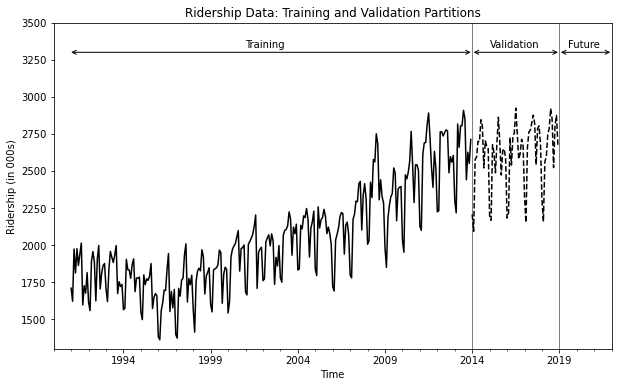

In [104]:
# Plot partitioned data. 

# Plot training data set.
ax = train_ts.plot(color='black', linewidth=1.5, figsize=(10,6))

# Plot valiation data set.
valid_ts.plot(ax = ax, color='black', linestyle='dashed', linewidth=1.5)

# Use template of graph layout for partitions. 
Graph_Layout_Partition_Data()

# Create graph legend and title.
plt.title('Ridership Data: Training and Validation Partitions')

# Set unnecessary legend invisible in the chart.  
# ax.legend().set_visible(False)

plt.show()

### Fit regression model with quadratic trend and seasonality for training partition. Identify regression residuals for training partition. Identify residuals' trailing MA for training partition. Plot regression residuals and trailing MA for training partition. 

In [105]:
# Create a time series dataframe with additional linear trend term (t) 
# and constant term (c) for entire data set. This will enable 
# to develop training and validation partitions with trend and
# seasonality.
ridership_df = tsatools.add_trend(ridership_ts, trend='ct')
print('Entire Data Set with Trend and Constant')
print(ridership_df)

# Develop monthly index for ridership_df.
ridership_df['Month'] = ridership_df.index.month

# Partition the training data set using ridership_df and print it. 
train_df = ridership_df[:nTrain]
print(' ')
print('Training Data Set')
print(train_df)

# Partition the validation data set using ridership_df and print it. 
valid_df = ridership_df[nTrain:]
print(' ')
print('Validation Data Set')
print(' ')
print('Validation Data Set')
print(valid_df.head())
print('                 ...')
print(valid_df.tail())


Entire Data Set with Trend and Constant
            Ridership  const  trend
Date                               
1991-01-01   1708.917    1.0    1.0
1991-02-01   1620.586    1.0    2.0
1991-03-01   1972.715    1.0    3.0
1991-04-01   1811.665    1.0    4.0
1991-05-01   1974.964    1.0    5.0
...               ...    ...    ...
2018-08-01   2848.935    1.0  332.0
2018-09-01   2522.367    1.0  333.0
2018-10-01   2807.200    1.0  334.0
2018-11-01   2873.968    1.0  335.0
2018-12-01   2668.049    1.0  336.0

[336 rows x 3 columns]
 
Training Data Set
            Ridership  const  trend  Month
Date                                      
1991-01-01   1708.917    1.0    1.0      1
1991-02-01   1620.586    1.0    2.0      2
1991-03-01   1972.715    1.0    3.0      3
1991-04-01   1811.665    1.0    4.0      4
1991-05-01   1974.964    1.0    5.0      5
...               ...    ...    ...    ...
2013-08-01   2851.979    1.0  272.0      8
2013-09-01   2440.153    1.0  273.0      9
2013-10-01   2625.

In [106]:
# Based on the original ridrship_ts series data, 
# create ridership_df data set with linear trend and 
# seasonality (trend = 'ct'). 
ridership_df = tsatools.add_trend(ridership_ts, trend='ct')
ridership_df['Month'] = ridership_df.index.month

# Use statsmodels' (sm) ols() function (ordinary least squares) to create 
# regression model with linear trend and seasonality for training data.
trend_seas = sm.ols(formula='Ridership ~ trend + C(Month)', 
                      data=train_df).fit()

# See summary of linear trend and seasonality model ans associated parameters. 
print(' ')
print("Parameters for Linear Trend and Seasonality Regression")
print(trend_seas.summary())

# Develop and show regression model values.
trend_seas_values = trend_seas.predict(train_df)
print(" ")
print('Regression Predictions for Training Partition')
print(trend_seas_values)


 
Parameters for Linear Trend and Seasonality Regression
                            OLS Regression Results                            
Dep. Variable:              Ridership   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     120.5
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           2.02e-99
Time:                        00:44:15   Log-Likelihood:                -1747.1
No. Observations:                 276   AIC:                             3520.
Df Residuals:                     263   BIC:                             3567.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [107]:
# Identify and display regression residuals for training
# partition(differences between actual and regression 
# values in the same periods).
trend_seas_res = trend_seas.resid
print('Regression Residuals in Training Partition')
trend_seas_res

Regression Residuals in Training Partition


Date
1991-01-01    402.955799
1991-02-01    352.185668
1991-03-01    343.670712
1991-04-01    188.043147
1991-05-01    301.998408
                 ...    
2013-08-01    163.377940
2013-09-01     58.572288
2013-10-01    100.704810
2013-11-01     27.321114
2013-12-01    170.088853
Length: 276, dtype: float64

In [108]:
# Apply trailing MA for residuals with window width k=4
# for training partition.
ma_trail_res = trend_seas_res.rolling(4).mean()

# Display trailing MA for residuals. 
print('Trailing MA Residuals, k=4, for Training Partition')
print(ma_trail_res)

Trailing MA Residuals, k=4, for Training Partition
Date
1991-01-01           NaN
1991-02-01           NaN
1991-03-01           NaN
1991-04-01    321.713832
1991-05-01    296.474484
                 ...    
2013-08-01    197.461842
2013-09-01    161.338049
2013-10-01    133.601125
2013-11-01     87.494038
2013-12-01     89.171766
Length: 276, dtype: float64


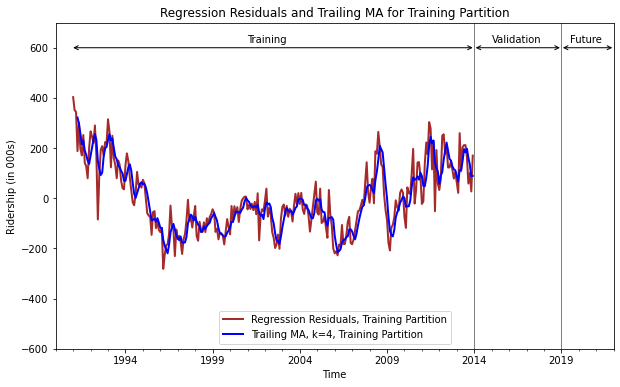

In [109]:
# Plot regression residuals and trailing MA, 
# k=4, in training partition
fig, ax = plt.subplots(figsize=(10, 6))
ax = trend_seas_res.plot(ax=ax, color='brown', linewidth=2)
ma_trail_res.plot(ax=ax, color='blue', linewidth=2)

# Use template of graph layout for residuals with partitions.
Graph_Layout_Partition_Residuals()

# Add legend and title of the plot.
ax.legend(['Regression Residuals, Training Partition', 
           'Trailing MA, k=4, Training Partition'],
           loc = 'lower center')
plt.title('Regression Residuals and Trailing MA for Training Partition')

plt.show()

### Forecast using regression and trailing MA for validation period. Plot regression forecast and trailing MA in training and validation periods. Measure accuracy of regression and two-level forecast.

In [110]:
# Create regression forecast with linear trend and seasonality 
# for validation period.  
trend_seas_pred = trend_seas.predict(valid_df)

# Display the first 5 and last 5 records for predicted data 
# in validation period.
print('Linear Trend and Seasonality Forecast for Validation Data')
print(trend_seas_pred.head())
print()
print(trend_seas_pred.tail())

Linear Trend and Seasonality Forecast for Validation Data
Date
2014-01-01    2275.613962
2014-02-01    2238.053093
2014-03-01    2598.697049
2014-04-01    2593.274615
2014-05-01    2642.618354
dtype: float64

Date
2018-08-01    2899.395138
2018-09-01    2592.374791
2018-10-01    2735.909269
2018-11-01    2734.176964
2018-12-01    2752.556225
dtype: float64


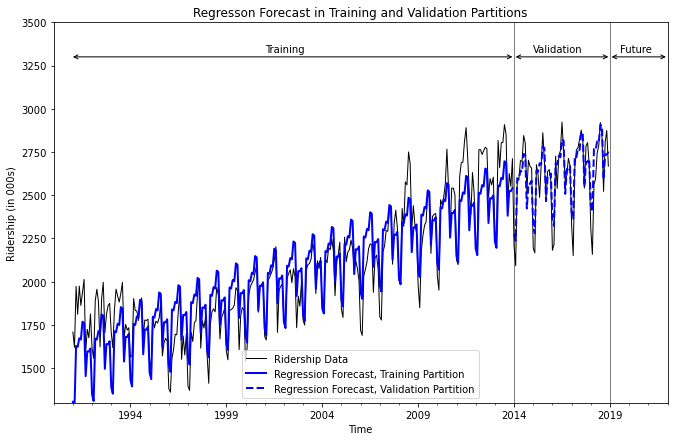

In [111]:
# Plot original data and regression forecast for training and 
# validation partitions.

# Plot entire data set that combines training and validation.
ax = ridership_ts.plot(color='black', linewidth=1, figsize=(11,7))

# Plot seasonality model for training and valiation sets.
trend_seas_values.plot(ax = ax, color="blue", linewidth=2)
trend_seas_pred.plot(ax = ax, color="blue", style='--', linewidth=2)

# Use template of graph layout for partitions. 
Graph_Layout_Partition_Data()

# Create graph legend and title.
ax.legend(['Ridership Data', 'Regression Forecast, Training Partition', 
           'Regression Forecast, Validation Partition'],
           loc = 'lower center')
plt.title('Regresson Forecast in Training and Validation Partitions')

plt.show()

In [112]:
# Create regression residuals in validation period.
trend_seas_res_valid = valid_ts - trend_seas_pred

# Display regression residuals, first 5 and last 5 records.
print(trend_seas_res_valid.head())
print()
print(trend_seas_res_valid.tail())

Date
2014-01-01    -68.825962
2014-02-01   -145.234093
2014-03-01    -22.746049
2014-04-01     -0.280615
2014-05-01     57.560646
Freq: MS, dtype: float64

Date
2018-08-01    -50.460138
2018-09-01    -70.007791
2018-10-01     71.290731
2018-11-01    139.791036
2018-12-01    -84.507225
Freq: MS, dtype: float64


In [113]:
# Create residuals' forecast for validation period using 
# trailing MA, k=4.                    
ma_trail_res_pred = pd.Series(ma_trail_res[-1], 
                      index = valid_ts.index)
# Display residuals' forecast, first 5 and last 5 records.
print(ma_trail_res_pred.head())
print()
print(ma_trail_res_pred.tail())

Date
2014-01-01    89.171766
2014-02-01    89.171766
2014-03-01    89.171766
2014-04-01    89.171766
2014-05-01    89.171766
Freq: MS, dtype: float64

Date
2018-08-01    89.171766
2018-09-01    89.171766
2018-10-01    89.171766
2018-11-01    89.171766
2018-12-01    89.171766
Freq: MS, dtype: float64


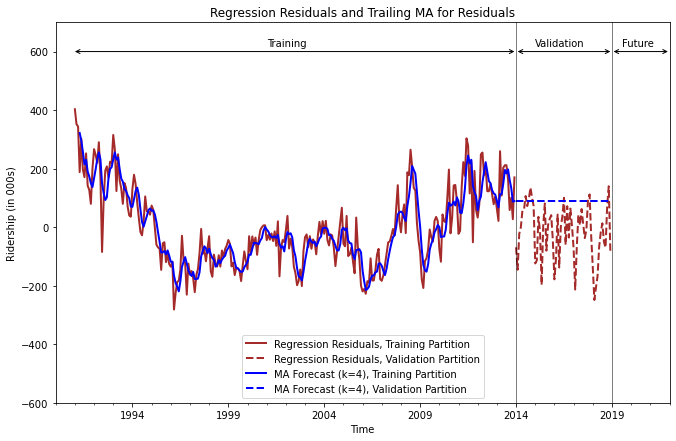

In [114]:
# Plot residuals and MA residuals forecast in training and validation partitions.
ax = trend_seas_res.plot(color='brown', linewidth=2, figsize=(11,7))
trend_seas_res_valid.plot(ax = ax, color="brown", style='--', linewidth=2)
ma_trail_res.plot(ax = ax, color="blue", linewidth=2)
ma_trail_res_pred.plot(ax = ax, color="blue", style='--', linewidth=2)

# Use template of graph layout for residuals with partitions.
Graph_Layout_Partition_Residuals()

# Create graph legend and title.
ax.legend(['Regression Residuals, Training Partition', 
           'Regression Residuals, Validation Partition', 
           'MA Forecast (k=4), Training Partition',
           'MA Forecast (k=4), Validation Partition'],
         loc = 'lower center')
plt.title('Regression Residuals and Trailing MA for Residuals')

plt.show()

In [115]:
# Develop two-level forecast for validation period by combining  
# regression forecast and trailing MA forecast for residuals.
fst_2level = trend_seas_pred + ma_trail_res_pred
print(fst_2level.head())
print()
print(fst_2level.tail())

Date
2014-01-01    2364.785729
2014-02-01    2327.224859
2014-03-01    2687.868816
2014-04-01    2682.446381
2014-05-01    2731.790120
dtype: float64

Date
2018-08-01    2988.566905
2018-09-01    2681.546557
2018-10-01    2825.081035
2018-11-01    2823.348731
2018-12-01    2841.727992
dtype: float64


In [116]:
# Create a table for validation period: validation data, regression 
# forecast, trailing MA for residuals and total forecast.

# Create a table with regression forecast, trailing MA 
# for residuals and total forecast for 12 months into 
# the future.
valid_df= round(pd.concat([valid_ts, trend_seas_pred, 
                            ma_trail_res_pred, 
                            fst_2level], axis = 1,), 3)

# Add column names in the table.
valid_df.columns = ['Ridership','Regression.Fst', 
                             'MA.Residuals.Fst', 
                             'Combined.Fst']

# Display table's first 5 and last 5 rows.  
print(valid_df.head())
print()
print()
print(valid_df.tail())

            Ridership  Regression.Fst  MA.Residuals.Fst  Combined.Fst
Date                                                                 
2014-01-01   2206.788        2275.614            89.172      2364.786
2014-02-01   2092.819        2238.053            89.172      2327.225
2014-03-01   2575.951        2598.697            89.172      2687.869
2014-04-01   2592.994        2593.275            89.172      2682.446
2014-05-01   2700.179        2642.618            89.172      2731.790


            Ridership  Regression.Fst  MA.Residuals.Fst  Combined.Fst
Date                                                                 
2018-08-01   2848.935        2899.395            89.172      2988.567
2018-09-01   2522.367        2592.375            89.172      2681.547
2018-10-01   2807.200        2735.909            89.172      2825.081
2018-11-01   2873.968        2734.177            89.172      2823.349
2018-12-01   2668.049        2752.556            89.172      2841.728


In [117]:
# Use Forecast_Accuracy(actual, forecast) function 
# defined in this file to identfiy common accuracy
# measures for regression with linear trend 
# and seasonality in validation period.
print('Accuracy Measures for Regression with Linear \
Trend and Seasonality in Validation Period')
print(Forecast_Accuracy(valid_ts, trend_seas_pred))

# Use Forecast_Accuracy(actual, forecast) function 
# defined in this file to identfiy common accuracy 
# measures for combined regression (with linear trend and 
# seasonlaity) and MA residuals in validation period.
print(' ')
print('Accuracy Measures for Combined Regression and \
MA Residuals in Validation Period')
print(Forecast_Accuracy(valid_ts, fst_2level))

Accuracy Measures for Regression with Linear Trend and Seasonality in Validation Period
{'ME': -17.224, 'RMSE': 95.541, 'MAE': 76.238, 'MPE': -0.892, 'MAPE': 3.04, 'ACF1': 0.42}
 
Accuracy Measures for Combined Regression and MA Residuals in Validation Period
{'ME': -106.396, 'RMSE': 141.956, 'MAE': 112.054, 'MPE': -4.325, 'MAPE': 4.528, 'ACF1': 0.42}


### Use regression and trailing MA forecasts for entire data set. Use 2-level (combined) forecast to forecast 12 future periods. Measure accuracy of regression and 2-level forecasts for entrire data set. 

In [118]:
# Use statsmodels' (sm) ols() function (ordinary least squares) to create 
# regression model with linear trend and seasonality for training data.
tot_trend_seas = sm.ols(formula='Ridership ~ trend + C(Month)', 
                      data=ridership_df).fit()

# See summary of linear trend and seasonality model ans associated parameters. 
print(' ')
print("Parameters for Lienar Trend and Seasonality Regression for Entire Data Set")
print(tot_trend_seas.summary())

# Develop and show regression model values.
tot_trend_seas_values = tot_trend_seas.predict(ridership_df)
print(" ")
print('Regression Predictions for Entire Ridership Data Set')
print(tot_trend_seas_values)

 
Parameters for Lienar Trend and Seasonality Regression for Entire Data Set
                            OLS Regression Results                            
Dep. Variable:              Ridership   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     224.6
Date:                Thu, 17 Nov 2022   Prob (F-statistic):          1.05e-148
Time:                        00:44:17   Log-Likelihood:                -2109.0
No. Observations:                 336   AIC:                             4244.
Df Residuals:                     323   BIC:                             4294.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [119]:
# Create a dataframe with 12 periods into the future and
# forecast for these 12 periods into the future.  
# the ridership_ts.
Month = pd.Series(['2019-01-01','2019-02-01','2019-03-01',
                   '2019-04-01','2019-05-01','2019-06-01',
                   '2019-07-01','2019-08-01','2019-09-01',
                   '2019-10-01','2019-11-01','2019-12-01'], 
                      name='Month')     
trend = pd.Series([337, 338, 339, 340, 341, 342, 343, 344, 
                   345, 346, 347, 348], name='trend')
idx = [337, 338, 339, 340, 341, 342, 343, 344, 
                 345, 346, 347, 348]
Month.index = idx
trend.index = idx
future12 = pd.concat([Month, trend], axis=1)
future12.index = idx
Month = pd.to_datetime(Month)

# Convert the date information to a datetime object 
# as monthly data.
future12['Date'] = pd.to_datetime(future12.Month, 
                      format='%Y/%m/%d')

# Convert dataframe column to time series (name is used 
# to label the data).
future12_ts = pd.Series(future12.trend.values, 
                 index=future12.Date, name='trend')

future12_df=tsatools.add_trend(future12_ts, trend='c')
future12_df['Month'] = future12_df.index.month

In [120]:
# Create forecast for the 12 periods into the future and show it.  
tot_trend_seas_pred = round(tot_trend_seas.predict(future12_df), 3)

print(' ')
print("Forecast for 12 Future Periods")
print(tot_trend_seas_pred)

 
Forecast for 12 Future Periods
Date
2019-01-01    2456.301
2019-02-01    2409.923
2019-03-01    2792.287
2019-04-01    2784.801
2019-05-01    2836.938
2019-06-01    2841.993
2019-07-01    2951.144
2019-08-01    2926.603
2019-09-01    2628.541
2019-10-01    2779.037
2019-11-01    2783.325
2019-12-01    2782.436
dtype: float64


In [121]:
# Identify and display residuals for time series 
# based on the regression(differences between actual 
# and regression values in the same periods).
tot_trend_seas_res = tot_trend_seas.resid
print('Regression Residuals for Entire Data Set')
print(tot_trend_seas_res)

# Apply trailing MA with window width k=4  
# to forecast residuals for entire data set. 
tot_ma_trail_res = tot_trend_seas_res.rolling(4).mean()

# Display trailing MA for residuals.
print(' ')
print("Trailing MA Residuals, k = 4, Entire Data Set")
print(tot_ma_trail_res)

Regression Residuals for Entire Data Set
Date
1991-01-01    414.942370
1991-02-01    372.989477
1991-03-01    342.754192
1991-04-01    189.190120
1991-05-01    300.352120
                 ...    
2018-08-01    -36.156477
2018-09-01    -64.662370
2018-10-01     69.674273
2018-11-01    132.154666
2018-12-01    -72.875013
Length: 336, dtype: float64
 
Trailing MA Residuals, k = 4, Entire Data Set
Date
1991-01-01           NaN
1991-02-01           NaN
1991-03-01           NaN
1991-04-01    329.969040
1991-05-01    301.321477
                 ...    
2018-08-01    -22.324049
2018-09-01    -25.789433
2018-10-01     -5.091317
2018-11-01     25.252523
2018-12-01     16.072889
Length: 336, dtype: float64


In [122]:
# Create time series dates for the 12 future periods starting
# from 2004-04-01.
future_months_12 = pd.Series(pd.date_range(start = '2019-01-01',  
                       periods = 12, freq = 'MS')) 

# Create forecast for trailing MA residuals for the 12 periods 
# into the future.
tot_ma_trail_res_pred = round(pd.Series(tot_ma_trail_res[-1], 
                      index = future_months_12), 3)

# Display trailing MA forecast for residulas for 12 periods
# into the future. 
print(' ')
print('MA Residuals for Future 12 Months')
print(tot_ma_trail_res_pred)

 
MA Residuals for Future 12 Months
2019-01-01    16.073
2019-02-01    16.073
2019-03-01    16.073
2019-04-01    16.073
2019-05-01    16.073
2019-06-01    16.073
2019-07-01    16.073
2019-08-01    16.073
2019-09-01    16.073
2019-10-01    16.073
2019-11-01    16.073
2019-12-01    16.073
dtype: float64


In [123]:
# Develop 2-level forecast for future 12 periods by combining 
# regression forecast and trailing MA for residuals for future
# 12 periods.
tot_fst_2level = tot_trend_seas_pred + tot_ma_trail_res_pred
tot_fst_2level


Date
2019-01-01    2472.374
2019-02-01    2425.996
2019-03-01    2808.360
2019-04-01    2800.874
2019-05-01    2853.011
2019-06-01    2858.066
2019-07-01    2967.217
2019-08-01    2942.676
2019-09-01    2644.614
2019-10-01    2795.110
2019-11-01    2799.398
2019-12-01    2798.509
dtype: float64

In [124]:
# Create a table with regression forecast, trailing MA 
# for residuals and total forecast for 12 months into 
# the future.
future12_df = round(pd.concat([tot_trend_seas_pred, 
                               tot_ma_trail_res_pred, 
                               tot_fst_2level],
                               axis = 1,), 3)

# Add column names in the table.
future12_df.columns = ['Regression.Fst', 
                             'MA.Residuals.Fst', 
                             'Combined.Fst']

# Print table.  
future12_df


,Regression.Fst,MA.Residuals.Fst,Combined.Fst
2019-01-01,2456.301,16.073,2472.374
2019-02-01,2409.923,16.073,2425.996
2019-03-01,2792.287,16.073,2808.360
2019-04-01,2784.801,16.073,2800.874
2019-05-01,2836.938,16.073,2853.011
2019-06-01,2841.993,16.073,2858.066
2019-07-01,2951.144,16.073,2967.217
2019-08-01,2926.603,16.073,2942.676
2019-09-01,2628.541,16.073,2644.614
2019-10-01,2779.037,16.073,2795.110


In [125]:
# Use Forecast_Accuracy(actual, forecast) function 
# defined in this file to to identfiy common 
# accuracy measures for regression with linear trend 
# and seasonality. 
print('Accuracy Measures for Regression with Linear \
Trend and Seasonality for Entire Data Set')
print(Forecast_Accuracy(ridership_ts, tot_trend_seas_values))

# Use Forecast_Accuracy(actual, forecast) function 
# defined in this file to identfiy common accuracy 
# measures for combined regression (with linear trend
# and seasonlaity) and MA residuals.
print(' ')
print('Accuracy Measures for Combined Regression and \
MA Residuals')
print(Forecast_Accuracy(ridership_ts, 
                       tot_trend_seas_values + tot_ma_trail_res))

Accuracy Measures for Regression with Linear Trend and Seasonality for Entire Data Set
{'ME': -0.0, 'RMSE': 128.744, 'MAE': 103.733, 'MPE': -0.33, 'MAPE': 5.103, 'ACF1': 0.793}
 
Accuracy Measures for Combined Regression and MA Residuals
{'ME': -1.557, 'RMSE': 59.443, 'MAE': 46.529, 'MPE': -0.15, 'MAPE': 2.211, 'ACF1': nan}


### Generate plot of original data and regression forecast and predictions into future 12 periods.

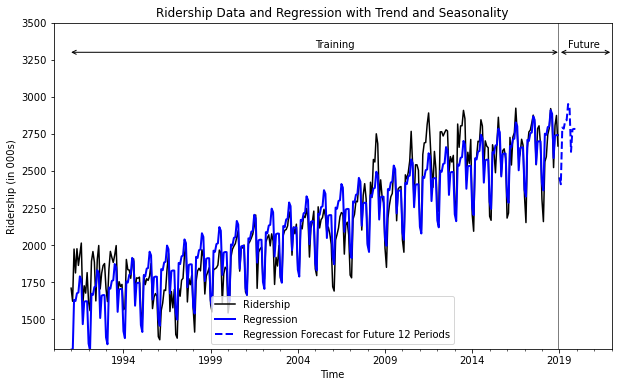

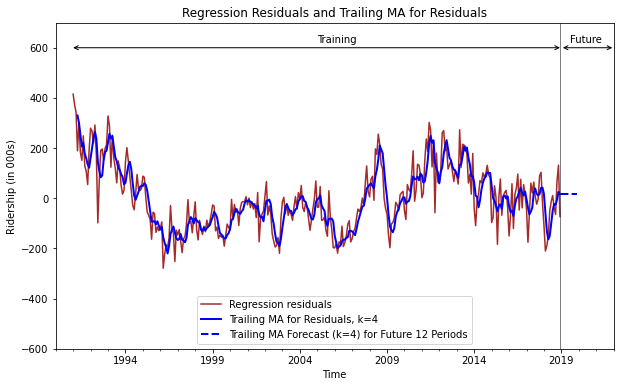

In [126]:
# Plot original Ridership time series data, regresssion model,
# and forecast into the future 12 periods.
fig, ax = plt.subplots(figsize=(10, 6))
ax = ridership_ts.plot(ax=ax, color='black', linewidth=1.5)
tot_trend_seas_values.plot(ax=ax, color='blue', linewidth=2)
tot_trend_seas_pred.plot(ax=ax, color='blue', style='--', 
                         linewidth=2)

# Determine coordinates for drawing vertical lines and horizontal 
# arrows and on the chart.
Graph_Layout_Entire_Data()

# Create legend and title for the chart.
ax.legend(['Ridership', 'Regression', 'Regression Forecast \
for Future 12 Periods'], 
          loc = 'lower center')
plt.title('Ridership Data and Regression with Trend \
and Seasonality')


# Plot regression residuals data and trailing MA based on 
# residuals.
fig, ax = plt.subplots(figsize=(10, 6))
ax = tot_trend_seas_res.plot(ax=ax, color='brown', linewidth=1.5)
tot_ma_trail_res.plot(ax=ax, color='blue', linewidth=2)
tot_ma_trail_res_pred.plot(ax=ax, style="--", color='blue', linewidth=2)

# Determine coordinates for drawing vertical lines and horizontal 
# arrows and on the chart.
Graph_Layout_Entire_Data_Residuals()

# Create legend and title for the chart.
ax.legend(['Regression residuals', 'Trailing MA for Residuals, k=4', 
           'Trailing MA Forecast (k=4) for Future 12 Periods'],
           loc = 'lower center')
plt.title('Regression Residuals and Trailing MA for Residuals')

plt.show()